In [12]:
import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt
import glob
import datetime
import numpy as np
import matplotlib.dates as mdates

In [15]:
#importing Citibike and Covid data

covid = pd.read_csv("covid_cases.csv")
citi2020 = pd.read_csv("finalciti_2020.csv")

#merging covid and citibike
citi_covid = pd.merge(citi2020, covid, on = "Date", how = "outer")
citi_covid = citi_covid.dropna()
citi_covid.head()

,Unnamed: 0_x,trips,Date,end date,start station name,end station name,Unnamed: 0_y,Case Count,Hospitalized Count,Death Count
0,110763,110763,2020-03-01,2020-03-01,Newport PATH,Hamilton Park,1,0,4,0
1,162915,162915,2020-03-01,2020-03-01,Glenwood Ave,Sip Ave,1,0,4,0
2,162916,162916,2020-03-01,2020-03-01,Newport Pkwy,Grove St PATH,1,0,4,0
3,162917,162917,2020-03-01,2020-03-01,JC Medical Center,JC Medical Center,1,0,4,0
4,162918,162918,2020-03-01,2020-03-01,Brunswick & 6th,Newark Ave,1,0,4,0


In [24]:
newdf = citi_covid.groupby(["trips", "Date", "Case Count", "Hospitalized Count","Death Count"]).size().to_frame('size').reset_index()
newdf.sort_values(by=['Date'])

,trips,Date,Case Count,Hospitalized Count,Death Count,size
110763,110763,2020-03-01,0,4,0,1
162915,162915,2020-03-01,0,4,0,1
162916,162916,2020-03-01,0,4,0,1
162917,162917,2020-03-01,0,4,0,1
162918,162918,2020-03-01,0,4,0,1
...,...,...,...,...,...,...
73588,73588,2020-06-30,444,37,23,1
73587,73587,2020-06-30,444,37,23,1
73586,73586,2020-06-30,444,37,23,1
110759,110759,2020-06-30,444,37,23,1


NameError: name 'Citibike' is not defined

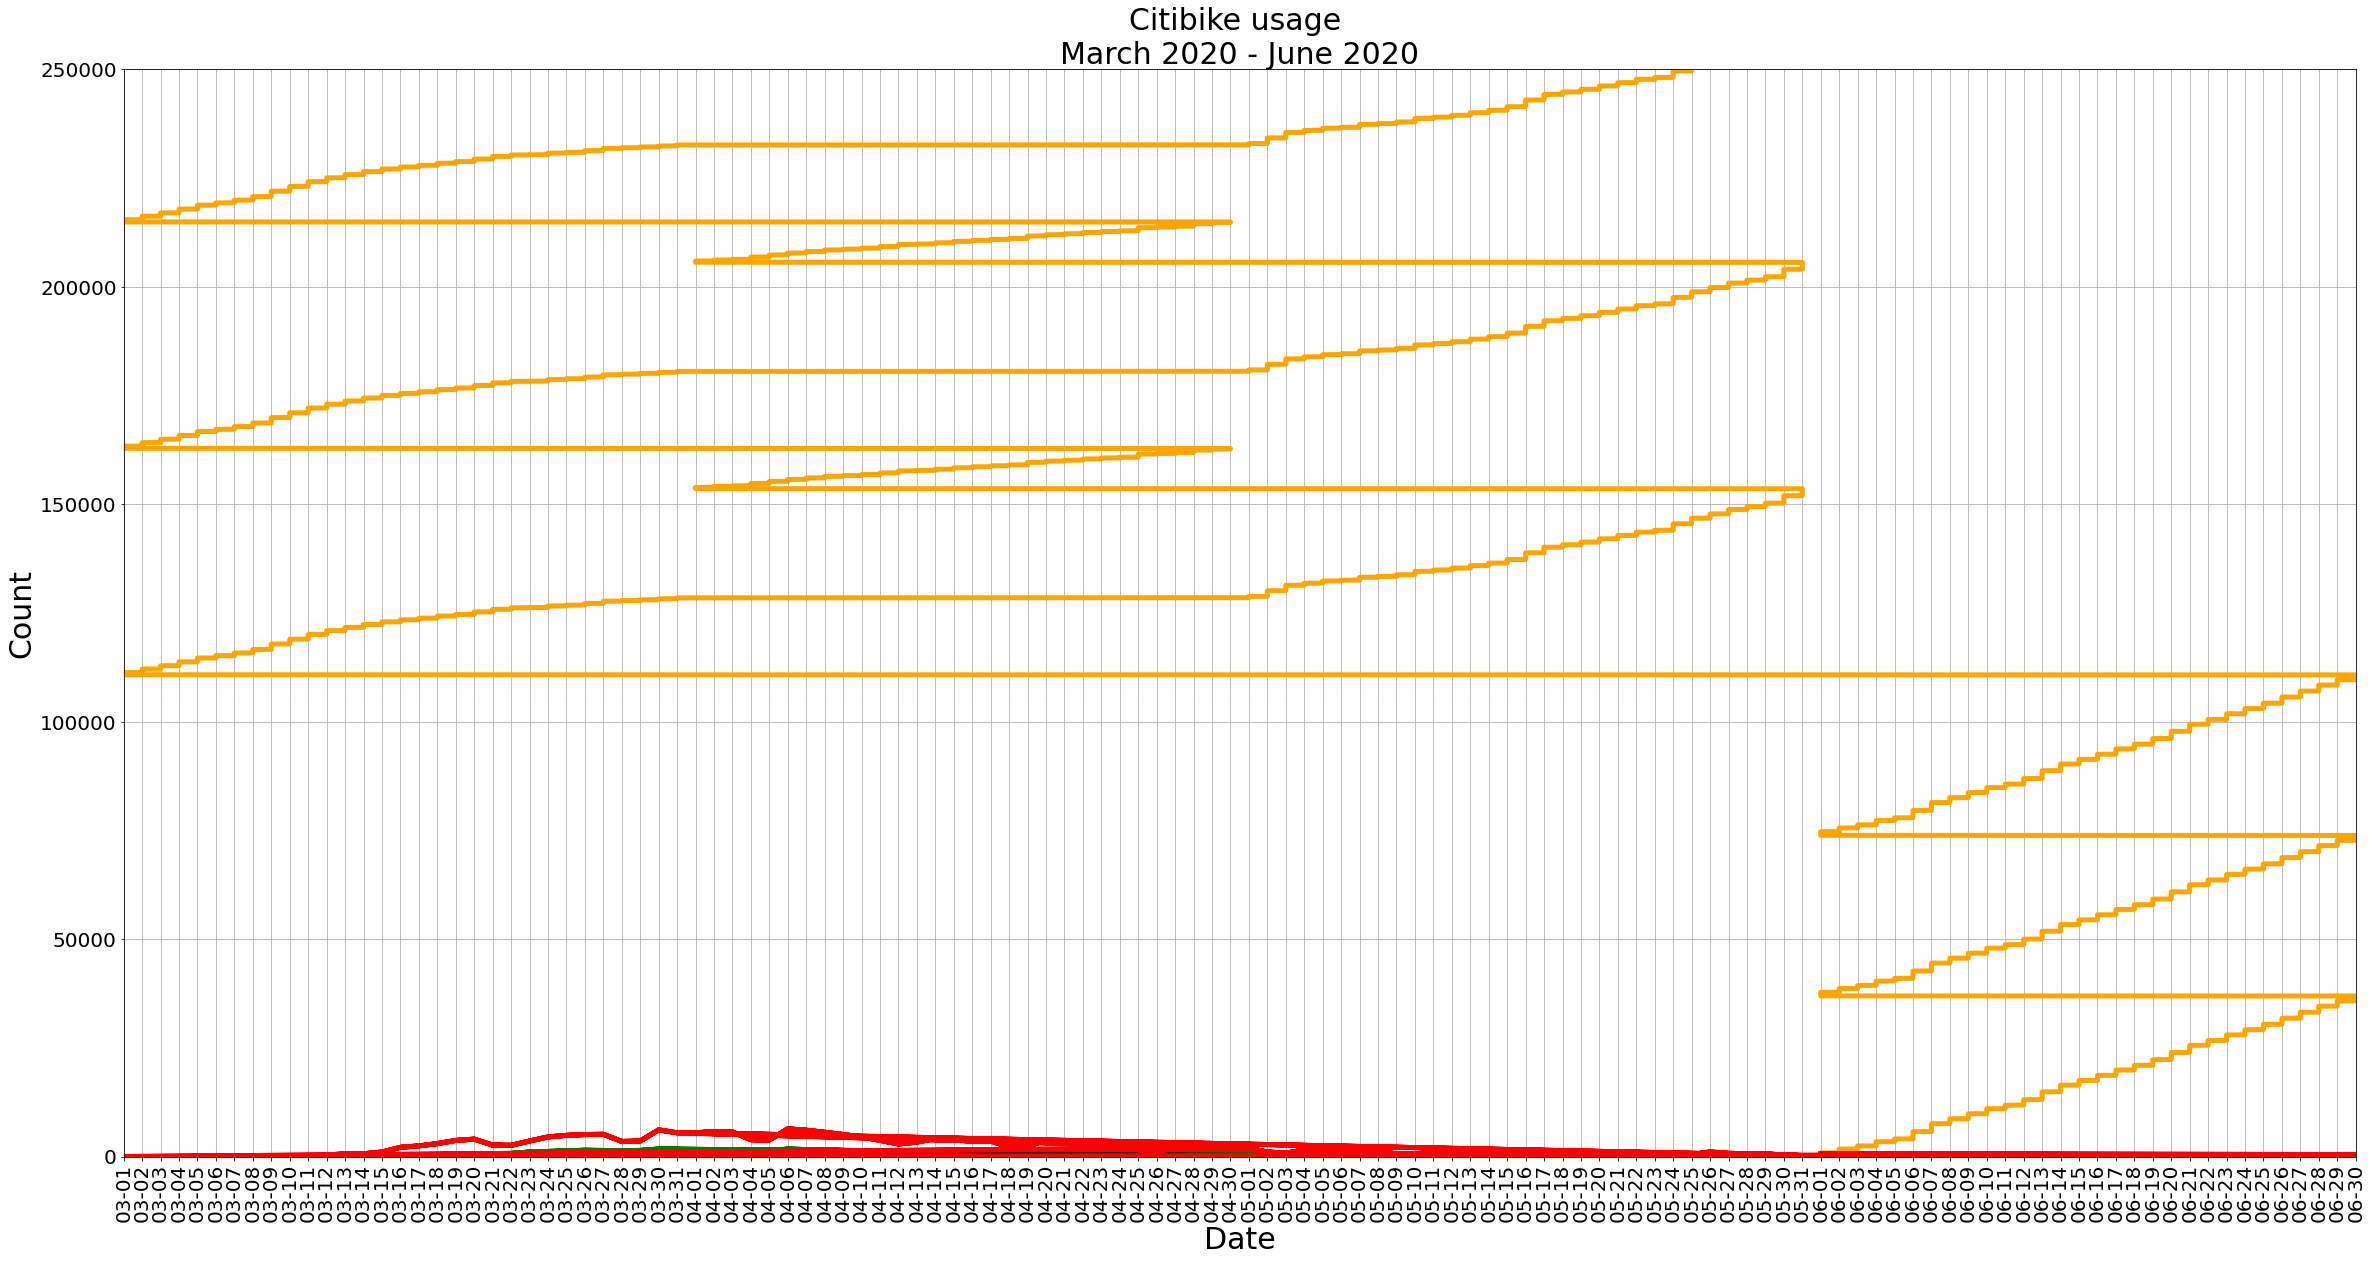

In [26]:
#get the values of x and y axis 
dates = newdf["Date"]
x = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in dates]
y = newdf["trips"]
g = newdf["Hospitalized Count"]
f = newdf["Death Count"]
c = newdf["Case Count"]

fig, ax = plt.subplots(figsize=(40, 20))
#get axes
ax = plt.gca()
#format as dates
formatter = mdates.DateFormatter("%m-%d")
#set locator
ax.xaxis.set_major_formatter(formatter)
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
ax.grid(True)

#plot values
trips, = plt.plot(x,y,c='orange',linewidth=5,label='trips')
Hospitalized, = plt.plot(x,g,c='green',linewidth=5, label='Hospitalized Count')
Deaths, =plt.plot(x,f,c='black',linewidth=5, label='Death Count')
covid, = plt.plot(x,c,c='red',linewidth=5, label='Covid')

#set labels, lim, size, titile and legend on the graph
plt.xlabel("Date", fontsize = 30)
plt.xticks(rotation = 90, fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlim(datetime.date(2020, 3, 1), datetime.date(2020, 6, 30))
plt.ylabel("Count", fontsize = 30)
plt.ylim(0, 250000)
plt.title("Citibike usage \nMarch 2020 - June 2020", fontsize = 30)

plt.legend(handles=[Citibike,Hospitalizations,Covid, Deaths], loc="best",prop={'size': 30})

#plt.tight_layout()
plt.show()